# 时间序列的处理

在金融数据分析中，最经常遇到的数据就是金融时间序列

时间序列相较于普通的截面数据，有自身的一些特殊需求，如数据时间频率的转换，交易日非交易日的处理等等

pandas针对金融时间序列的特殊数据分析需求，专门开发了一系列用于时间处理的操作

但在学习这些操作之前，我们需要先了解，python是如何存储时间的。

## python的时间模块——datetime模块

在我们的数据库系统里，时间是一个很重要的组成部分，日常最方便的表示时间的方式就是8位字符串或者是8位数字

例如，2008年1月1日，可以用字符串表示为"20080101"，或用数字表示为20080101

但仅仅使用数字或字符串表示时间，仅仅具有 __区分功能__ ，而没有 __运算功能__

意思是可以通过字符串和数字的不同表示不同的时间，但是却无法进行时间的各种运算如时间偏移，频率转换

例如20080131之后一天，如果直接加1的话，得到的是20080132，不是一个合法的时间格式

然而自己写函数进行判断麻烦且没有必要，因为python通过datetime模块较好的解决了这个问题

首先我们import datetime模块

In [2]:
import datetime

使用datetime模块里的datetime类可以表示时间

In [3]:
dt = datetime.datetime(2008, 1, 1)

#### 注意是datetime模块里的datetime类，datetime.datetime才可以访问，很多初学者容易直接键入datetime

#### datetime是模块
#### datetime.datetime才是类

最简单的构造datetime的方式是通过构造函数（注意datetime.datetime的构造函数是支持输入小时和分钟，秒等的，但是我们基本上遇不到高频数据，所以在后面的分析中，我们不会接触到日频率以下的表示）

### 构建datetime对象及与时间字符串的转换

构建一个datetime对象可以通过以下几种方式：

1.直接调用datetime.datetime的构造函数

In [4]:
dt = datetime.datetime(2008, 1, 1)
dt

datetime.datetime(2008, 1, 1, 0, 0)

In [5]:
dt.year

2008

In [6]:
dt.month

1

In [7]:
dt.day

1

2.通过时间字符串格式化得到

In [8]:
dt_str = "20090101"
dt = datetime.datetime.strptime(dt_str, "%Y%m%d")
dt

datetime.datetime(2009, 1, 1, 0, 0)

%加字母用来表示时间格式  %Y表示4位数字年份，%m表示2位数字月份，%d表示2位数字的日期

%Y%m%d格式就会将前4位数字识别为年份，随后的2位数字识别为月份，再随后的2位数字识别为日期。  
如果字符串和格式不匹配就会报错

In [10]:
dt_str = "20092-01-01"
dt = datetime.datetime.strptime(dt_str, "%Y-%m-%d")
dt

ValueError: time data '20092-01-01' does not match format '%Y-%m-%d'

In [11]:
dt_str = "2009-01-31"
dt = datetime.datetime.strptime(dt_str, "%Y-%m-%d")
dt

datetime.datetime(2009, 1, 31, 0, 0)

当然除了这三个时间格式还有很多其他的时间格式

%y 两位数的年份表示（00-99） 

%Y 四位数的年份表示（0000-9999）

%m 月份（01-12）

%d 月内中的一天（00-31）

%H 24小时制小时数（00-23）

%I 12小时制小时数（01-12）

%M 分钟数（00-59）

%S 秒（00-59）

%a 本地简化星期名称 (Thu)

%A 本地完整星期名称 (Thursday)

%b 本地简化的月份名称 (Jan)

%B 本地完整的月份名称 (January)

%c 本地相应的日期表示和时间表示 (Thu Jan  1 00:00:00 2009)

%j 年内的一天（001-366）

%p 本地A.M.或P.M.的等价符

%U 一年中的星期数（00-53）星期天为星期的开始

%w 星期（0-6），星期天为星期的开始

%W 一年中的星期数（00-53）星期一为星期的开始

%x 本地相应的日期表示 (01/31/09)

%X 本地相应的时间表示 (00:00:00)

%Z 当前时区的名称 

当然大多数我们都用不到

datetime.datetime.strptime方法用来将字符串转换为datetime.datetime对象       
也可以使用datetime.datetime.strftime方法将datetime.datetime对象转换成一定格式的字符串    
这种字符串与datetime.datetime对象的互相转换是非常常用的   

In [12]:
dt

datetime.datetime(2009, 1, 31, 0, 0)

In [13]:
dt.strftime("%Y%m%d")

'20090131'

In [14]:
dt.strftime("%Y-%m-%d")

'2009-01-31'

In [15]:
dt.strftime("%Y-%m-%d %H:%M:%S")

'2009-01-31 00:00:00'

例如，我们有一个列表里，全是8位字符串（例如"20090101"）的时间，想转换成靠直线连接年月日的字符串（"2009-01-01"）

In [16]:
dt_str_list1 = ["20090101", "20090102", "20090103", "20090104", "20090105"]
dt_str_list2 = [datetime.datetime.strptime(dt_str, "%Y%m%d").strftime("%Y-%m-%d") for dt_str in dt_str_list1]
dt_str_list2

['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04', '2009-01-05']

### datetime对象的运算

对时间进行偏移运算，需要使用datetime.timedelta对象

In [17]:
dt

datetime.datetime(2009, 1, 31, 0, 0)

In [18]:
dt + datetime.timedelta(1)

datetime.datetime(2009, 2, 1, 0, 0)

In [19]:
dt + datetime.timedelta(5)

datetime.datetime(2009, 2, 5, 0, 0)

In [20]:
dt + datetime.timedelta(1)*2

datetime.datetime(2009, 2, 2, 0, 0)

## pandas对于时间的处理

In [21]:
import pandas as pd
import numpy as np

当将一个全为datetime.datetime对象的集合数据结构转换为pandas中的数据类型时（Index Series），pandas会自动识别，并将其转换为特定类型

例如

In [22]:
dt_list = [datetime.datetime(2008, 1, 1), datetime.datetime(2008, 1, 2), datetime.datetime(2008, 1, 3), datetime.datetime(2008, 1, 4)]

In [23]:
dt_list

[datetime.datetime(2008, 1, 1, 0, 0),
 datetime.datetime(2008, 1, 2, 0, 0),
 datetime.datetime(2008, 1, 3, 0, 0),
 datetime.datetime(2008, 1, 4, 0, 0)]

In [24]:
pd.Series(dt_list)

0   2008-01-01
1   2008-01-02
2   2008-01-03
3   2008-01-04
dtype: datetime64[ns]

注意这里的Series的dtype不是常见的int64 float64 object，而是专门用来存储时间的datetime64[ns]

In [25]:
pd.Index(dt_list)

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04'], dtype='datetime64[ns]', freq=None)

转换为Index则会自动识别时间并生成专用的DatetimeIndex，DatetimeIndex也是一种Index，Index有的属性和方法他都有，但是他还有Index没有的一些专门处理时间的属性和方法（实际上DatetimeIndex类是继承自Index类的，感兴趣的可以百度 python类的继承，不感兴趣可以无视）


当然有的时候是从一个全为时间字符串的集合数据结构进行转换的，pandas提供了to_datetime函数

In [26]:
dt_str_list1 = ["20090101", "20090102", "20090103", "20090104", "20090105"]
dt_str_list2 = ["2009-01-01", "2009-01-02", "2009-01-03", "2009-01-04", "2009-01-05"]
dt_str_ser1 = pd.Series(dt_str_list1)
dt_str_ser2 = pd.Series(dt_str_list2)

In [27]:
pd.to_datetime(dt_str_list1)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

In [28]:
pd.to_datetime(dt_str_list2)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

转list会自动生成DatetimeIndex（因为大多数情况下我们将时间转换成pandas里的数据结构，都是想用作Index，所以pd.to_datetime函数设计的时候就默认了生成的数据结构）

In [29]:
当然转Series就是

NameError: name '当然转Series就是' is not defined

In [30]:
pd.to_datetime(dt_str_ser1)

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
dtype: datetime64[ns]

In [31]:
pd.to_datetime(dt_str_ser2)

0   2009-01-01
1   2009-01-02
2   2009-01-03
3   2009-01-04
4   2009-01-05
dtype: datetime64[ns]

通过上面的例子我们可以发现，常用的"%Y%m%d"或"%Y-%m-%d"格式的时间字符串会被自动识别

如果想要转换特定格式的字符串，也可以传入format参数  
比如下面的例子里，我们将月份和天数调换顺序，默认的识别方式就无法识别了

In [32]:
dt_str_list3 = ["2009-01-01", "2009-02-01", "2009-03-01", "2009-04-01", "2009-05-01", "2009-31-01"]
pd.to_datetime(dt_str_list3)

ValueError: month must be in 1..12

指定了format之后就可以识别了

In [33]:
pd.to_datetime(dt_str_list3, format="%Y-%d-%m")

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-31'],
              dtype='datetime64[ns]', freq=None)

需要注意的是，无论是DatetimeIndex还是dtype为datetime64[ns]的Series，这些容器里的元素已经不是datetime.datetime对象了，而是pandas里的TimeStamp对象

In [34]:
dt_list = [datetime.datetime(2008, 1, 1), datetime.datetime(2008, 1, 2), datetime.datetime(2008, 1, 3), datetime.datetime(2008, 1, 4)]
dt_ser = pd.Series(dt_list)

In [35]:
dt_list[0]

datetime.datetime(2008, 1, 1, 0, 0)

In [36]:
type(dt_list[0])

datetime.datetime

In [37]:
dt_ser[0]

Timestamp('2008-01-01 00:00:00')

In [38]:
type(dt_ser[0])

pandas._libs.tslibs.timestamps.Timestamp

pandas.TimeStamp是pandas在datetime.datetime对象的基础上，进行了一些包装，但是datetime.datetime有的属性和方法TimeStamp都有，如year属性，strftime方法等等。

In [39]:
time_stamp = dt_ser[0]
time_stamp

Timestamp('2008-01-01 00:00:00')

In [40]:
time_stamp.year

2008

In [41]:
time_stamp.strftime("%Y%m%d")

'20080101'

大家可以理解为TimeStamp和datetime.datetime基本没有区别，大家不要对此产生困惑，pandas不用原始的datetime.datetime，而是自己又建立了一个类TimeStamp的原因可能是出于内部实现的考虑，我们不需要知道细节。

pd.to_datetime的用法很广泛，接收的参数也不一定得是list或是Series，单独的时间字符串也是可以的

In [42]:
pd.to_datetime("20080101")

Timestamp('2008-01-01 00:00:00')

### DatetimeIndex的介绍

金融时间序列数据经常需要以时间作为index，pandas里专门提供了一种元素全为时间（TimeStamp）的index，即DatetimeIndex

构建DatetimeIndex的方法主要有两种  
1.直接调用DatetimeIndex的构造函数，或者使用to_datetime函数构建

In [43]:
dt_str_list = ["2009-01-01", "2009-01-02", "2009-01-03", "2009-01-04", "2009-01-05"]

In [44]:
pd.DatetimeIndex(dt_str_list)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

In [45]:
pd.to_datetime(dt_str_list)

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05'],
              dtype='datetime64[ns]', freq=None)

2.使用pd.date_range函数生成

给定开始时间和结束时间

In [46]:
pd.date_range("2008-01-01", "2008-01-05")

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05'],
              dtype='datetime64[ns]', freq='D')

给定开始时间和需要生成的DatetimeIndex长度

In [47]:
pd.date_range("2008-01-01", periods=6)

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06'],
              dtype='datetime64[ns]', freq='D')

可以用freq参数改变频率，常见的如"m"月份，"w-mon"周一等等

In [48]:
pd.date_range("2008-01-01", "2008-12-31", freq="m")

DatetimeIndex(['2008-01-31', '2008-02-29', '2008-03-31', '2008-04-30',
               '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31',
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31'],
              dtype='datetime64[ns]', freq='M')

In [49]:
pd.date_range("2008-01-01", "2008-12-31", freq="w-mon")

DatetimeIndex(['2008-01-07', '2008-01-14', '2008-01-21', '2008-01-28',
               '2008-02-04', '2008-02-11', '2008-02-18', '2008-02-25',
               '2008-03-03', '2008-03-10', '2008-03-17', '2008-03-24',
               '2008-03-31', '2008-04-07', '2008-04-14', '2008-04-21',
               '2008-04-28', '2008-05-05', '2008-05-12', '2008-05-19',
               '2008-05-26', '2008-06-02', '2008-06-09', '2008-06-16',
               '2008-06-23', '2008-06-30', '2008-07-07', '2008-07-14',
               '2008-07-21', '2008-07-28', '2008-08-04', '2008-08-11',
               '2008-08-18', '2008-08-25', '2008-09-01', '2008-09-08',
               '2008-09-15', '2008-09-22', '2008-09-29', '2008-10-06',
               '2008-10-13', '2008-10-20', '2008-10-27', '2008-11-03',
               '2008-11-10', '2008-11-17', '2008-11-24', '2008-12-01',
               '2008-12-08', '2008-12-15', '2008-12-22', '2008-12-29'],
              dtype='datetime64[ns]', freq='W-MON')

In [133]:
pd.date_range("2008-01-01", "2008-12-31", freq="w-thu")

DatetimeIndex(['2008-01-03', '2008-01-10', '2008-01-17', '2008-01-24',
               '2008-01-31', '2008-02-07', '2008-02-14', '2008-02-21',
               '2008-02-28', '2008-03-06', '2008-03-13', '2008-03-20',
               '2008-03-27', '2008-04-03', '2008-04-10', '2008-04-17',
               '2008-04-24', '2008-05-01', '2008-05-08', '2008-05-15',
               '2008-05-22', '2008-05-29', '2008-06-05', '2008-06-12',
               '2008-06-19', '2008-06-26', '2008-07-03', '2008-07-10',
               '2008-07-17', '2008-07-24', '2008-07-31', '2008-08-07',
               '2008-08-14', '2008-08-21', '2008-08-28', '2008-09-04',
               '2008-09-11', '2008-09-18', '2008-09-25', '2008-10-02',
               '2008-10-09', '2008-10-16', '2008-10-23', '2008-10-30',
               '2008-11-06', '2008-11-13', '2008-11-20', '2008-11-27',
               '2008-12-04', '2008-12-11', '2008-12-18', '2008-12-25'],
              dtype='datetime64[ns]', freq='W-THU')

freq可选的取值有如下，基本满足所需，如有特殊需要需自定义，较为麻烦，有兴趣可以问我（如每年1，4，7，10月的第二个交易日星期五之类的）

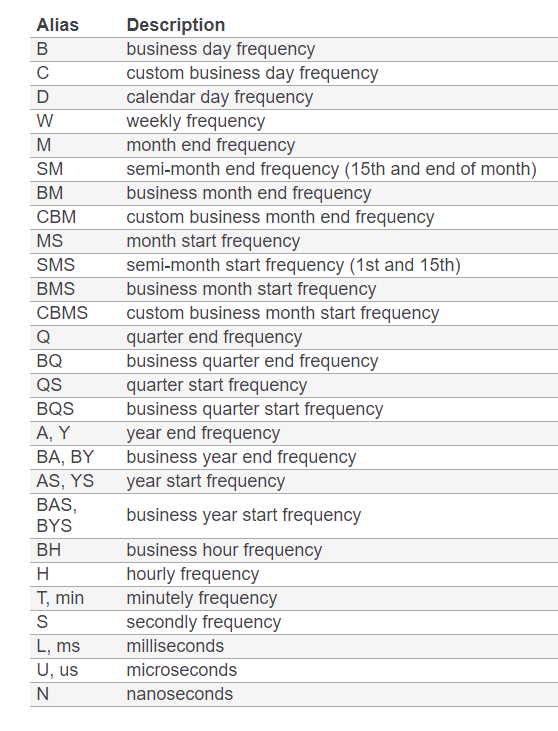

### DatetimeIndex的索引

In [57]:
df = pd.DataFrame(np.random.randn(60, 5),
             index=pd.date_range("2010-01-01", periods=60),
             columns=["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "000005.SZ"])

In [71]:
df

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ
2010-01-01,0.113398,0.425798,-0.392296,0.683009,-0.789828
2010-01-02,1.922640,0.092194,0.607691,0.172712,0.015335
2010-01-03,1.380554,0.842115,0.013588,0.347950,1.638189
2010-01-04,-0.663432,0.085455,-0.432676,-0.457802,0.611273
2010-01-05,-0.255987,0.421117,1.246094,-0.129419,0.674631
2010-01-06,0.786186,-1.615272,-0.885444,-0.657019,-0.798388
2010-01-07,-0.577109,0.298353,0.795358,-0.160196,-0.707037
2010-01-08,0.762981,0.597551,-0.046559,0.306030,0.601991
2010-01-09,-0.544763,-1.172730,-0.507936,1.528952,-0.944010
2010-01-10,-0.680500,-0.384061,1.331755,1.126256,0.404108


带有DatetimeIndex的对象索引是比较特殊的，因为pandas为了使用上的便捷性优化了索引方法

例如，我们想要选取2010年2月28日对应的这一行

例如，虽然我们的DatetimeIndex的元素实际上是一个个TimeStamp，但我们并没有必要先构造一个TimeStamp，再将这个TimeStamp传入进行索引（当然这样做是可以的）

In [75]:
dt_str = "2010-02-28"
dt_ts = pd.to_datetime(dt_str)
dt_ts

Timestamp('2010-02-28 00:00:00')

In [78]:
df.loc[dt_ts, :]

000001.SZ   -0.077556
000002.SZ   -0.412275
000003.SZ    0.210111
000004.SZ    0.171588
000005.SZ    1.102303
Name: 2010-02-28 00:00:00, dtype: float64

事实上直接传入时间字符串就够了，在使用DatetimeIndex进行索引时，pandas会自动将我们输入的字符串转换成TimeStamp再进行索引。

In [80]:
df.loc["2010-02-28", :]

000001.SZ   -0.077556
000002.SZ   -0.412275
000003.SZ    0.210111
000004.SZ    0.171588
000005.SZ    1.102303
Name: 2010-02-28 00:00:00, dtype: float64

时间序列还提供了特殊的索引方式，如选取2010年2月的数据可以按照如下选取，当然按照年份取也是可以的

In [87]:
df.loc["2010-02", :]

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ
2010-02-01,0.464698,0.280585,-0.922381,-0.050114,1.105453
2010-02-02,-0.486849,-0.718209,-0.889724,0.789996,0.873674
2010-02-03,-0.834263,-1.460212,0.279229,0.115128,0.951094
2010-02-04,-1.841961,0.241081,-1.147572,2.414509,0.569329
2010-02-05,-1.454713,-0.720147,-0.532582,-0.431159,-0.402441
2010-02-06,0.061453,-0.807314,-0.763929,1.254894,-1.572351
2010-02-07,-0.005774,-0.342981,-0.665846,-2.000990,0.580144
2010-02-08,-0.148830,-0.885749,0.426585,1.028307,-0.951095
2010-02-09,-0.097173,-0.599465,0.441385,0.584018,2.438998
2010-02-10,-1.265739,0.116146,0.426571,-0.702913,-0.662912


### DatetimeIndex的一些有用的属性和方法

In [96]:
dt_index = pd.date_range("2008-01-01", "2008-01-10")

In [97]:
dt_index

DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-05', '2008-01-06', '2008-01-07', '2008-01-08',
               '2008-01-09', '2008-01-10'],
              dtype='datetime64[ns]', freq='D')

In [98]:
dt_index.year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008], dtype='int64')

In [99]:
dt_index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')

In [100]:
dt_index.day

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [101]:
dt_index.is_month_start

array([ True, False, False, False, False, False, False, False, False,
       False])

不一一列举，详细常用属性见下表：

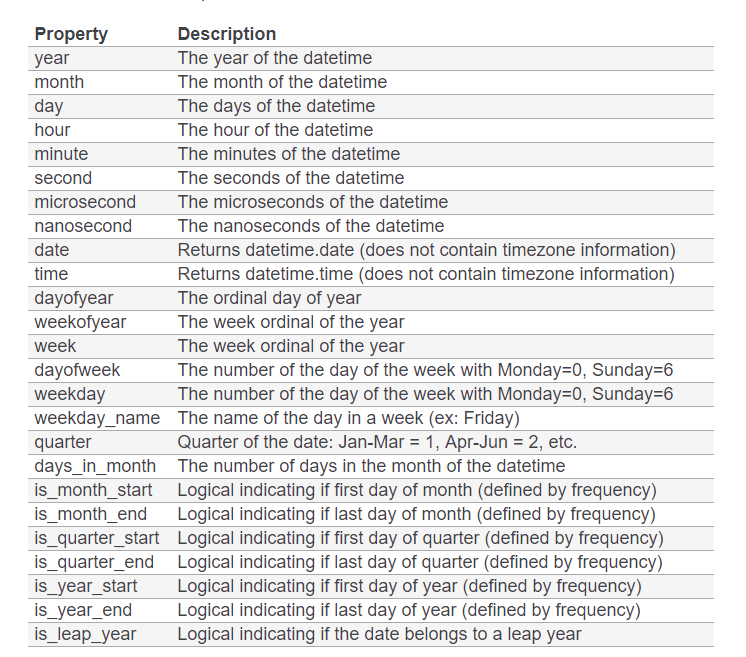

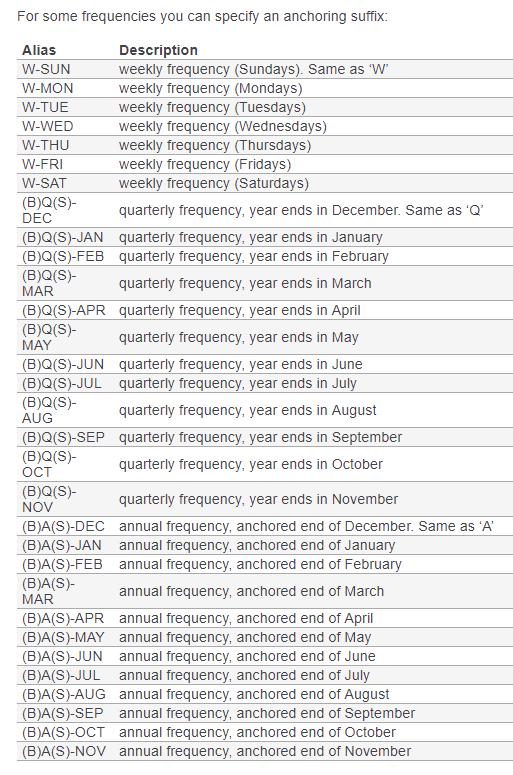

### 用resample方法进行时间序列频率转换

我们先使用随机数生成一连串的随机收益率序列

In [117]:
# bdate_range生成的日期index和date_range最大的区别就是bdate_range不包括双休日
# 由于是模拟收益率，我们暂时没考虑交易日
return_df = pd.DataFrame(np.random.randn(700, 5),
             index=pd.bdate_range("2010-01-01", periods=700),
             columns=["000001.SZ", "000002.SZ", "000003.SZ", "000004.SZ", "000005.SZ"])/100

In [119]:
return_df

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ
2010-01-01,0.012215,-0.009856,-0.002703,-0.011182,0.001507
2010-01-04,0.002553,0.001927,-0.012504,0.002256,-0.000010
2010-01-05,0.011596,-0.007920,-0.011301,0.008413,0.004248
2010-01-06,0.006472,-0.017252,-0.005612,0.004644,-0.018802
2010-01-07,-0.007336,0.011211,0.001757,-0.002712,0.004813
2010-01-08,-0.002699,-0.019419,-0.001394,0.013843,0.015919
2010-01-11,0.003114,0.004757,-0.018625,-0.004211,0.009386
2010-01-12,-0.011788,-0.006913,0.002988,-0.014754,0.013526
2010-01-13,-0.001721,-0.005479,-0.006050,0.007330,0.008510
2010-01-14,-0.011751,0.005454,0.006687,-0.006203,0.001241


用return_df可以用cumprod函数得到净值(以2010年1月1日前一个交易日的净值为1)

In [127]:
nv_df = (1 + return_df).cumprod()
nv_df

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ
2010-01-01,1.012215,0.990144,0.997297,0.988818,1.001507
2010-01-04,1.014799,0.992051,0.984826,0.991049,1.001497
2010-01-05,1.026567,0.984194,0.973696,0.999387,1.005751
2010-01-06,1.033211,0.967215,0.968232,1.004028,0.986841
2010-01-07,1.025631,0.978058,0.969933,1.001305,0.991591
2010-01-08,1.022862,0.959065,0.968581,1.015166,1.007376
2010-01-11,1.026048,0.963628,0.950542,1.010891,1.016831
2010-01-12,1.013953,0.956966,0.953381,0.995976,1.030585
2010-01-13,1.012208,0.951722,0.947613,1.003277,1.039355
2010-01-14,1.000314,0.956913,0.953950,0.997054,1.040645


将净值数据由日频转换为月频，我们通常需要以每个月最后一天净值作为该月净值就可以了

In [132]:
nv_df.resample("m").last()

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ
2010-01-31,1.032289,1.007609,0.916272,0.999099,0.952223
2010-02-28,1.012660,0.976189,0.909228,0.980903,0.975435
2010-03-31,1.020488,0.953678,0.939190,0.967840,1.018407
2010-04-30,1.044703,0.908587,0.966065,0.943724,1.012950
2010-05-31,1.059225,0.936579,1.010587,0.899905,0.974140
2010-06-30,1.112189,0.974954,1.028977,0.924888,0.943945
2010-07-31,1.123791,0.931041,0.924324,0.926070,0.902659
2010-08-31,1.144221,0.925494,0.850200,0.888783,0.962361
2010-09-30,1.169096,0.927286,0.903728,0.818848,0.921932
2010-10-31,1.099271,0.974880,0.906626,0.903546,0.912034


将收益率由日频转换为月频，我们通常需要计算每个月的收益率和，即 (1+r1)(1+r2)(1+r3)...(1+r31)-1

In [137]:
(1+return_df).resample("m").prod()-1

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ
2010-01-31,0.032289,0.007609,-0.083728,-0.000901,-0.047777
2010-02-28,-0.019015,-0.031182,-0.007687,-0.018212,0.024377
2010-03-31,0.007730,-0.023061,0.032953,-0.013317,0.044054
2010-04-30,0.023728,-0.047280,0.028615,-0.024918,-0.005358
2010-05-31,0.013901,0.030807,0.046086,-0.046432,-0.038314
2010-06-30,0.050002,0.040974,0.018197,0.027761,-0.030996
2010-07-31,0.010432,-0.045041,-0.101705,0.001279,-0.043738
2010-08-31,0.018180,-0.005959,-0.080193,-0.040265,0.066141
2010-09-30,0.021740,0.001937,0.062959,-0.078686,-0.042011
2010-10-31,-0.059726,0.051326,0.003208,0.103436,-0.010735


大家会发现这个和groupby的用法很像，除了我们刚刚用的last和sum，实际上还有其他很多可选方法

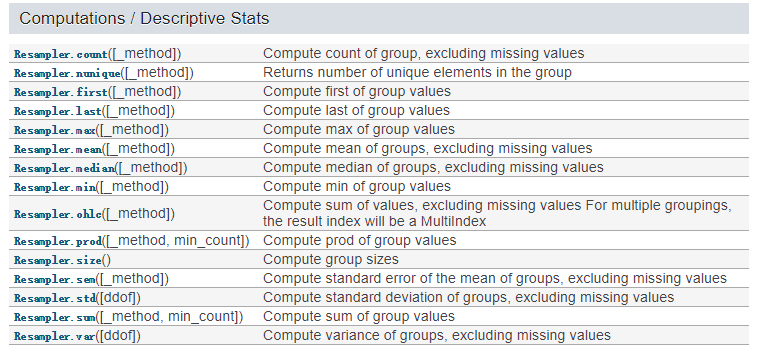

当然，他也可以接收apply方法，用于接收自定义函数

依旧使用我们常用的小技巧，在传入apply的函数里，加上print(),观看resample究竟传入了什么

In [141]:
def myfun(x):
    print(type(x), )
    print(x, "\n\n")
    return 1
nv_df.resample("m").apply(myfun)

<class 'pandas.core.series.Series'>
2010-01-01    1.012215
2010-01-04    1.014799
2010-01-05    1.026567
2010-01-06    1.033211
2010-01-07    1.025631
2010-01-08    1.022862
2010-01-11    1.026048
2010-01-12    1.013953
2010-01-13    1.012208
2010-01-14    1.000314
2010-01-15    0.995499
2010-01-18    0.990899
2010-01-19    0.984665
2010-01-20    0.995011
2010-01-21    0.996948
2010-01-22    1.009275
2010-01-25    1.020329
2010-01-26    1.037764
2010-01-27    1.041095
2010-01-28    1.031300
2010-01-29    1.032289
Name: 000001.SZ, dtype: float64 


<class 'pandas.core.series.Series'>
2010-02-01    1.025676
2010-02-02    1.021309
2010-02-03    1.024397
2010-02-04    1.019379
2010-02-05    1.019521
2010-02-08    1.021790
2010-02-09    1.022834
2010-02-10    1.012712
2010-02-11    1.006281
2010-02-12    1.021895
2010-02-15    1.012276
2010-02-16    1.029414
2010-02-17    1.010988
2010-02-18    0.998827
2010-02-19    1.006362
2010-02-22    1.014059
2010-02-23    1.012835
2010-02-24    1.015

,000001.SZ,000002.SZ,000003.SZ,000004.SZ,000005.SZ
2010-01-31,1.0,1.0,1.0,1.0,1.0
2010-02-28,1.0,1.0,1.0,1.0,1.0
2010-03-31,1.0,1.0,1.0,1.0,1.0
2010-04-30,1.0,1.0,1.0,1.0,1.0
2010-05-31,1.0,1.0,1.0,1.0,1.0
2010-06-30,1.0,1.0,1.0,1.0,1.0
2010-07-31,1.0,1.0,1.0,1.0,1.0
2010-08-31,1.0,1.0,1.0,1.0,1.0
2010-09-30,1.0,1.0,1.0,1.0,1.0
2010-10-31,1.0,1.0,1.0,1.0,1.0
